# Oasis Infobytes : Data Science Internship

## Task 1 : Iris Flower Classification

### Intern's Name : Syed Ameen Ikhlaas H
#### Batch - June Phase 2 OIBSIP.

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

Although the Scikit-learn library provides a dataset for iris flower classification, you can also
download the same [dataset](https://www.kaggle.com/datasets/saurabh00007/iriscsv) from here for the task of iris flower classification with Machine
Learning. 

DOWNLOAD DATASET FROM HERE: https://www.kaggle.com/datasets/saurabh00007/iriscsv

#### Importing required Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

#### Loading the dataset

In [2]:
iris = pd.read_csv('C:\\Users\\user\\Desktop\\Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [9]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
# Dropping unnecessary column
iris.drop('Id',axis=1,inplace=True)

#### Data Visualization

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

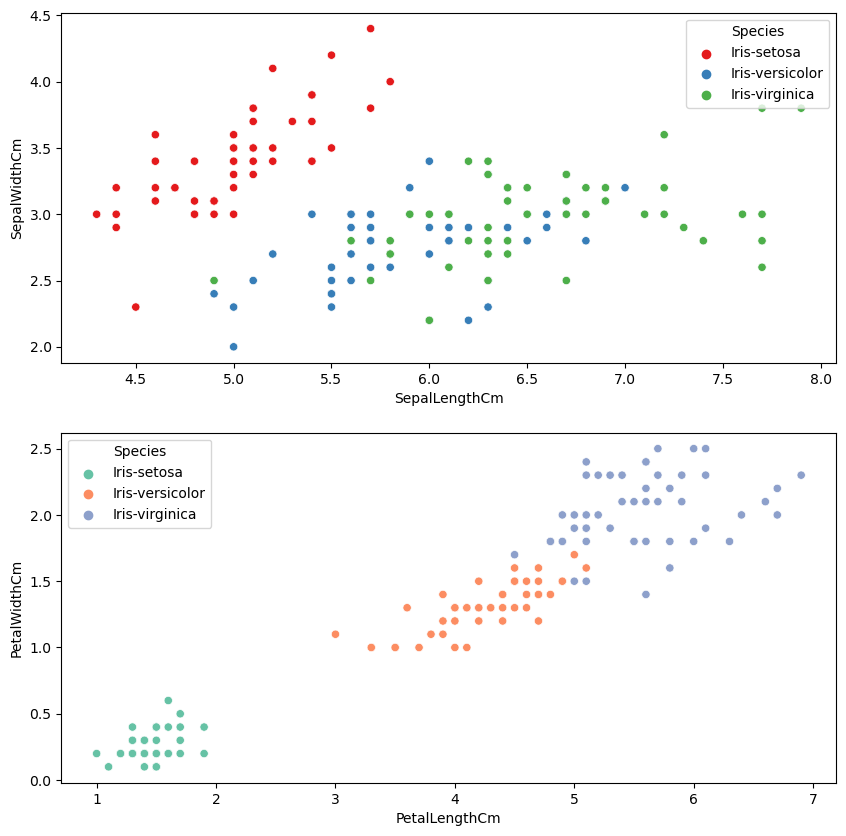

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=iris,palette='Set1')

plt.subplot(2,1,2)
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=iris,palette='Set2')


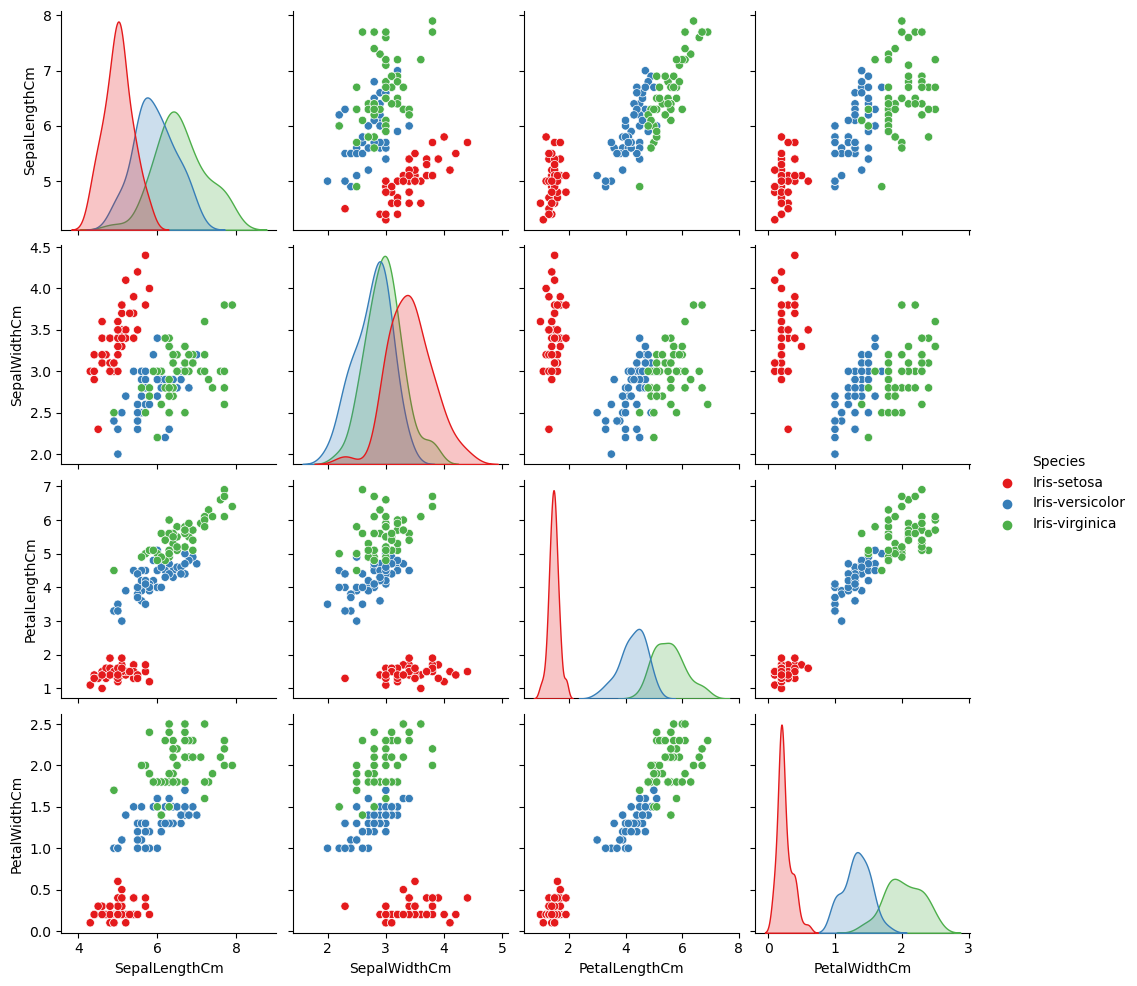

In [12]:
sns.pairplot(iris, hue='Species', palette='Set1')

#### Data Preprocessing

In [13]:
label_encoder = LabelEncoder()
iris.Species = label_encoder.fit_transform(iris.Species)

In [14]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris['Species'].unique()

array([0, 1, 2])

#### Splitting the Data into Train and Test Split

In [16]:
X = iris.drop('Species',axis=1)
Y = iris['Species']

In [17]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, y_train.shape, y_test.shape)

(150, 4) (112, 4) (38, 4)
(150,) (112,) (38,)


#### Training the Model 

In [21]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = tree.predict(X_test)

In [23]:
y_pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1])

In [24]:
print(accuracy_score(y_pred,y_test)*100)

94.73684210526315


In [25]:
print(accuracy_score(y_test,y_pred)*100)

94.73684210526315


In [26]:
print(confusion_matrix(y_test,y_pred))

[[16  0  0]
 [ 0 10  1]
 [ 0  1 10]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



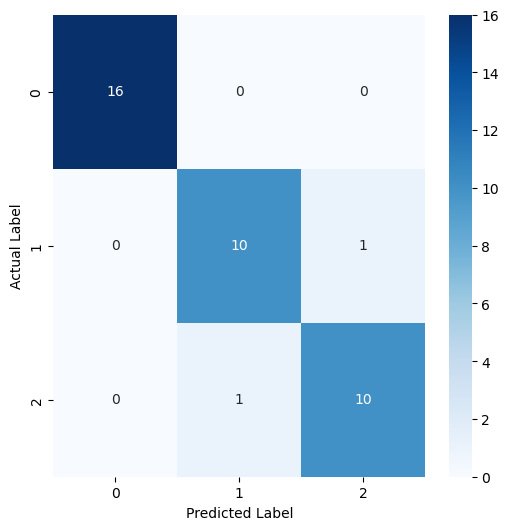

In [28]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

#### Making new prediction using a different/new datapoint

In [29]:
sample = np.array([[7.3,2.8,6.3, 1.8]]) #Prediction should be Iris-Verginica
print("The prediction is : ", int(tree.predict(sample)))

The prediction is :  2


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
